**[E1]**

1. Atlanta/NNP
2. dinner/NN
3. have/VBP
4. Can/MD

**[E2]**

1. It/PRP is/VBZ a/DT nice/JJ night/NN ./.
2. This/DT crap/NN game/NN is/VBZ over/IN a/DT garage/NN in/IN Fifty-second/NNP Street/NNP. . .
3. . . . Nobody/NN ever/RB takes/VBZ the/DT newspapers/NNS she/PRP sells/VBZ. . .
4. He/PRP is/VBZ a/DT tall/JJ ,/, skinny/JJ guy/NN with/IN a/DT long/JJ ,/, sad/JJ ,/, mean-looking/JJ kisser/NN ,/, and/CC a/DT mournful/JJ voice/NN ./.
5. . . . I/PRP am/VBP sitting/VBG in/IN Mindy/NNP ’s/POS restaurant/NN putting/VBG on/RP the/DT gefillte/NN fish/NN ,/, which/WDT is/VBZ a/DT dish/NN I/PRP am/VBP very/RB fond/JJ of/RP ,/, . . .
6. When/WRB a/DT guy/NN and/CC a/DT doll/NN get/VBP to/TO taking/VBG peeks/NNS back/RB and/CC forth/RB at/IN each/DT other/JJ ,/, why/WRB there/EX you/PRP are/VBP indeed/RB ./.

**[E3]**

In [1]:
import nltk
from nltk.corpus import brown
from collections import defaultdict as ddict

In [2]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
brown_adventure_tagged = brown.tagged_words(categories='adventure', tagset='universal')

In [3]:
class MostLikelyTagModel(object):
    def __init__(self):
        super(MostLikelyTagModel, self).__init__()
        self._word_tags = {}
        
    def train(self, tagged_sentences):
        # count number of times a word is given each tag
        word_tag_counts = ddict(lambda: ddict(lambda: 0))
        for word, tag in tagged_sentences:
            word_tag_counts[word][tag] += 1
        
        # select the tag used most often for the word
        for word in word_tag_counts:
            tag_counts = word_tag_counts[word]
            tag = max(tag_counts, key=tag_counts.get)
            self._word_tags[word] = tag
    
    def predict(self, word):
        # predict most common tags for the word or NOUN if have never seen
        get_tag = self._word_tags.get
        return get_tag(word, "NOUN")
    
    def _get_word_tuples(self, tagged_sentences):
        # convert a list of sentences into word-tag tuples
        word_tuples = []
        for word, tag in tagged_sentences:
            model_tags = self.predict(word)
            word_tuples.extend(zip(word, tag, model_tags))
        return word_tuples
    
    def _get_error(self, word_tuples):
        # calculate total and incorrect labels
        incorrect = 0
        for word, gold_tag, predicted_tag in word_tuples:
            if gold_tag != predicted_tag:
                incorrect += 1
        return incorrect/len(word_tuples)
    
    def get_error(self, tagged_sentences):
        word_tuples = self._get_word_tuples(tagged_sentences)
        return self._get_error(word_tuples)
    
    def get_known_unknown_error(self, tagged_sentences):
        # split predictions into known and unknown words
        known = []
        unknown = []
        for tup in self._get_word_tuples(tagged_sentences):
            word, _, _ = tup
            dest = known if word in self._word_tags else unknown
            dest.append(tup)

        #calculate and return known and unknown error rates
        return self._get_error(known), self._get_error(unknown)

In [4]:
baseline = MostLikelyTagModel()
baseline.train(brown_news_tagged)
error = baseline.get_error(brown_adventure_tagged)
print("Total error rate is {:.2f}".format(error))
known_error, unknown_error = baseline.get_known_unknown_error(brown_adventure_tagged)
print("Error rate for known words and unknown words are {:.2f} and {:.2f}".format(known_error, unknown_error))

Total error rate is 0.12
Error rate for known words and unknown words are 0.07 and 0.13


**[E4]**

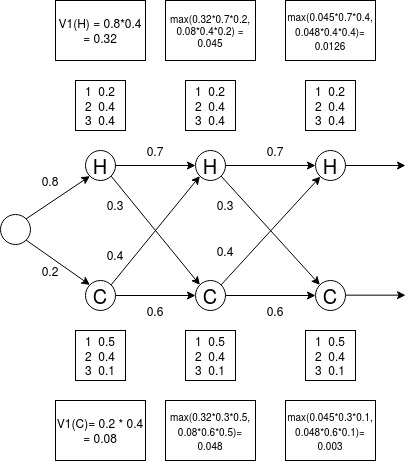

Using backpointer, we obtain H, H, H.

**[E5]**

Use maximum entropy markov model

**[E6]** 

In Turkish (as in all languages), many words are ambiguous in their part-of-speech tags, similar to *make* in English, which can both be a verb or a noun. The agglutinative nature of Turkish language usually helps resolution of such ambiguities due to morphotactical restrictions. On the other hand, this nature of the language introduces another kind of ambiguity, where a lexical form can be interpreted in many different ways (as illustrated in the question via two examples). 
So, morphological analysis can be helpful in specifying the PoS tag for a word, but a morphological disambiguation mechanism should be implemented beforehand, in order to handle morphological ambiguations.